## 安裝Fuzzy package

In [ ]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 建立 Fuzzy Set 及設定數值範圍 

In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import skfuzzy.control as fuzz_ctrl
from mpl_toolkits.mplot3d import Axes3D

# Range

## range of temp. & soil & watering 
x_temp_range = np.arange(42,123,1,np.float32)
x_soil_range = np.arange(0,101,1,np.float32)
y_time_range=np.arange(0,31,1,np.float32)
##　variable and membership functions
x_temp = fuzz_ctrl.Antecedent(x_temp_range,"temp")
x_soil= fuzz_ctrl.Antecedent(x_soil_range,"soil")
y_time = fuzz_ctrl.Consequent(y_time_range,"time")




## Membership functions

In [ ]:

x_temp["cold"] = fuzz.trapmf(x_temp_range,[42,42,52,68])
x_temp["cool"] = fuzz.trimf(x_temp_range,[53,65,75])
x_temp["normal"] = fuzz.trimf(x_temp_range,[69,80,90])
x_temp["warm"] = fuzz.trimf(x_temp_range,[75,85,95])
x_temp["hot"] = fuzz.trapmf(x_temp_range,[91,104,122,122])

x_soil["dry"] = fuzz.trapmf(x_soil_range,[0,0,18,30])
x_soil["moist"] = fuzz.trapmf(x_soil_range,[16.5,40.5,62.5,85])
x_soil["wet"] = fuzz.trapmf(x_soil_range,[75,88.6,100,100])

y_time["short"] = fuzz.trapmf(y_time_range,[0,0,3,9])
y_time["medium"] = fuzz.trapmf(y_time_range,[4,10,15,22])
y_time["long"] = fuzz.trapmf(y_time_range,[16,23,30,30])


## Rules

In [ ]:
## 質心模糊
y_time.defuzzify_method = "centroid"
## 輸出規則 
rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["hot"]&x_soil["dry"])|(x_temp["warm"]&x_soil["dry"])),consequent=y_time["long"],label="long")

rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["normal"]&x_soil["dry"])|(x_temp["cool"]&x_soil["dry"])|(x_temp["hot"]&x_soil["moist"])|(x_temp["warm"]&x_soil["moist"])|
(x_temp["normal"]&x_soil["moist"])),consequent = y_time["medium"],label="medium")
rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["cool"]&x_soil["moist"])|(x_temp["cold"]&x_soil["moist"])|(x_temp["hot"]&x_soil["wet"])|(x_temp["warm"]&x_soil["wet"])|(x_temp["normal"]&x_soil["wet"])|(x_temp["cool"]&x_soil["wet"])|(x_temp["cold"]&x_soil["wet"])|(x_temp['cold']&x_soil['dry'])),consequent=y_time["short"],label="short")


In [ ]:
system=fuzz_ctrl.ControlSystem(rules=[rule_long,rule_med,rule_short])
sys_sim=fuzz_ctrl.ControlSystemSimulation(system)


## 使用者輸入

In [ ]:
## 自訂輸入條件
input_temp = "-10"
input_soil = "-10"

while (int(input_temp) < 42 or int(input_temp) > 122):
  input_temp=input("請輸入溫度(℉)(42-122)")
while (int(input_soil) < 0 or int(input_soil) > 100):
  input_soil=input("請輸入土壤濕度(0-100)")
sys_sim.input["temp"]=int(input_temp)
sys_sim.input["soil"]=int(input_soil)


## system compute
sys_sim.compute()
out_y=sys_sim.output["time"]
print("溫度 ",input_temp,"(℉), 土壤濕度", input_soil, ", 時間", out_y)

請輸入溫度(℉)(42-122)1
請輸入溫度(℉)(42-122)46
請輸入土壤濕度(0-100)54
溫度  46 (℉), 土壤濕度 54 , 時間 3.250000013452438


## 可視化

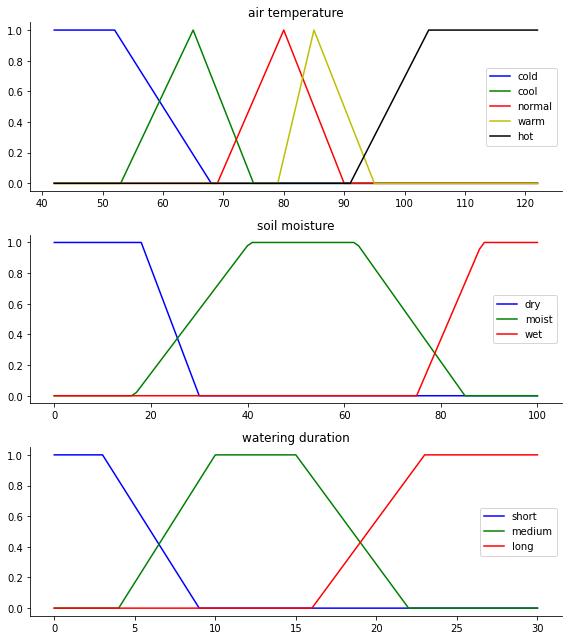

In [ ]:

# Visualize these universes and membership functions
fig,(figure1,figure2,figure3)=plt.subplots(nrows=3,figsize=(8,9))
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range,[42,42,52,68]),'b',linewidth=1.5,label='cold')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range,[53,65,75]),'g',linewidth=1.5,label='cool')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range,[69,80,90]),'r',linewidth=1.5,label='normal')
figure1.plot(x_temp_range,fuzz.trimf(x_temp_range,[79,85,95]),'y',linewidth=1.5,label='warm')
figure1.plot(x_temp_range,fuzz.trapmf(x_temp_range,[91,104,122,122]),'k',linewidth=1.5,label='hot')
figure1.set_title('air temperature')
figure1.legend()

figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range,[0,0,18,30]),'b',linewidth=1.5,label='dry')
figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range,[16.5,40.5,62.5,85]),'g',linewidth=1.5,label='moist')
figure2.plot(x_soil_range,fuzz.trapmf(x_soil_range,[75,88.6,100,100]),'r',linewidth=1.5,label='wet')
figure2.set_title('soil moisture')
figure2.legend()

figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[0,0,3,9]),'b',linewidth=1.5,label='short')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[4,10,15,22]),'g',linewidth=1.5,label='medium')
figure3.plot(y_time_range,fuzz.trapmf(y_time_range,[16,23,30,30]),'r',linewidth=1.5,label='long')
figure3.set_title('watering duration')
figure3.legend()

# plot 2d figures
for fi in (figure1,figure2,figure3):
  fi.spines['top'].set_visible(False)
  fi.spines['right'].set_visible(False)
  fi.get_xaxis().tick_bottom()
  fi.get_yaxis().tick_left()

plt.tight_layout()




# 3D figure


In [ ]:
from mpl_toolkits.mplot3d import Axes3D# Required for 3D plotting
def funz(x,y):
  sys_sim.input["temp"] = y
  sys_sim.input["soil"] = x 
  sys_sim.compute()
  z=sys_sim.output["time"]
  return z

fig1=plt.figure()#建立一個繪圖物件
ax=Axes3D(fig1)#用這個繪圖物件建立一個Axes物件(有3D座標)

X,Y=np.meshgrid(x_soil_range,x_temp_range)
Z=funz(X,Y)
ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap=plt.cm.coolwarm)#用取樣點(x,y,z)去構建曲面
ax.set_xlabel('soil',color='r')
ax.set_ylabel('air temperature',color='g')
ax.set_zlabel('watering',color='b')#給三個座標軸註明
plt.show()#顯示模組中的所有繪圖物件


<Figure size 432x288 with 0 Axes>